In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklego.datasets import load_penguins

df = load_penguins(as_frame=True).dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


Note that you'll need to run the notebook on port 8888 to work immediately. This is something required by jupyter's security protocal. For more information see [the FAQ](https://koaning.github.io/human-learn/examples/faq.html#im-getting-a-port-error).

In [3]:
from hulearn.experimental.interactive import InteractiveCharts

In [7]:
clf = InteractiveCharts(df, labels="species")

Loading BokehJS ...

In [8]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [9]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [15]:
import json 
import pathlib 

demo_data = clf.data()
# clf.to_json("drawn-model.json")
demo_data

[{'chart_id': 'f53840b5-6',
  'x': 'bill_length_mm',
  'y': 'bill_depth_mm',
  'polygons': {'Adelie': {'bill_length_mm': [], 'bill_depth_mm': []},
   'Gentoo': {'bill_length_mm': [], 'bill_depth_mm': []},
   'Chinstrap': {'bill_length_mm': [], 'bill_depth_mm': []}}},
 {'chart_id': 'bedddc4d-4',
  'x': 'flipper_length_mm',
  'y': 'body_mass_g',
  'polygons': {'Adelie': {'flipper_length_mm': [[176.6737951807229,
      172.17771084337352,
      179.8015060240964,
      190.55301204819278,
      204.43222891566265,
      211.27409638554218,
      218.89789156626506,
      202.08644578313255,
      188.20722891566265]],
    'body_mass_g': [[3094.6551724137935,
      3401.8965517241386,
      4369.137931034484,
      4812.931034482759,
      4892.5862068965525,
      4460.172413793104,
      3822.931034482759,
      2844.310344827587,
      2764.6551724137935]]},
   'Gentoo': {'flipper_length_mm': [[199.93614457831325,
      211.66506024096387,
      228.86746987951807,
      234.38852559284

You could save this data to disk if you like.

In [16]:
from hulearn.outlier import InteractiveOutlierDetector

model = InteractiveOutlierDetector(json_desc=demo_data)

In [17]:
X, y = df.drop(columns=['species']), df['species']

preds = model.fit(X, y).predict(X)
preds[:5]

array([1, 1, 1, 1, 1])

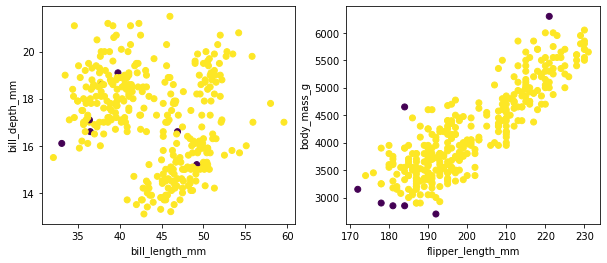

In [18]:
import matplotlib.pylab as plt 

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.subplot(122)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g');

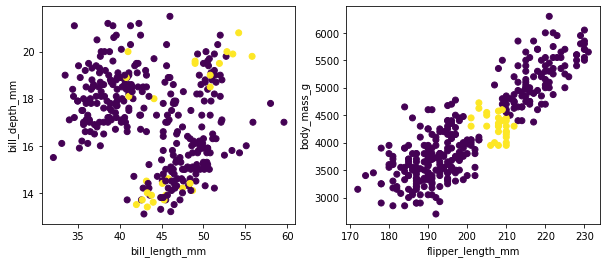

In [20]:
model = InteractiveOutlierDetector(json_desc=demo_data, threshold=2)
preds = model.fit(X, y).predict(X)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.subplot(122)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g');

# Combine the Approach!